<a href="https://colab.research.google.com/github/aakashr30/SVM-Project/blob/main/Day_7_Project_4_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/0 (1).MKCE/Datasets/Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
data.info

<bound method DataFrame.info of       User ID  Gender   Age  EstimatedSalary  Purchased
0    15624510    Male  19.0          19000.0          0
1    15810944    Male  35.0          20000.0          0
2    15668575  Female  26.0          43000.0          0
3    15603246  Female  27.0          57000.0          0
4    15804002    Male  19.0          76000.0          0
..        ...     ...   ...              ...        ...
395  15691863  Female  46.0          41000.0          1
396  15706071    Male  51.0          23000.0          1
397  15654296  Female  50.0          20000.0          1
398  15755018    Male  36.0          33000.0          0
399  15594041  Female  49.0          36000.0          1

[400 rows x 5 columns]>

In [ ]:
data2 = pd.get_dummies(data)

In [ ]:
data2

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,0,1
1,15810944,35.0,20000.0,0,0,1
2,15668575,26.0,43000.0,0,1,0
3,15603246,27.0,57000.0,0,1,0
4,15804002,19.0,76000.0,0,0,1
...,...,...,...,...,...,...
395,15691863,46.0,41000.0,1,1,0
396,15706071,51.0,23000.0,1,0,1
397,15654296,50.0,20000.0,1,1,0
398,15755018,36.0,33000.0,0,0,1


In [ ]:
x = data2.drop(['Purchased'],axis=1)
y = data2['Purchased']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 5)
(80, 5)
(320,)
(80,)


In [ ]:
#SVM packa
from sklearn.svm import SVC
model = SVC(probability=True)

In [ ]:
model.fit(x_train,y_train)

SVC(probability=True)

In [ ]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:

pre = model.predict(x_test)
model.predict_proba(x_test)

array([[0.47433097, 0.52566903],
       [0.69416315, 0.30583685],
       [0.52696243, 0.47303757],
       [0.51571855, 0.48428145],
       [0.69776118, 0.30223882],
       [0.78694608, 0.21305392],
       [0.84026557, 0.15973443],
       [0.20792543, 0.79207457],
       [0.59737008, 0.40262992],
       [0.73363245, 0.26636755],
       [0.68965889, 0.31034111],
       [0.62859712, 0.37140288],
       [0.63559963, 0.36440037],
       [0.57331794, 0.42668206],
       [0.47393867, 0.52606133],
       [0.29831112, 0.70168888],
       [0.52048252, 0.47951748],
       [0.46141538, 0.53858462],
       [0.27093485, 0.72906515],
       [0.79999745, 0.20000255],
       [0.71867907, 0.28132093],
       [0.19544375, 0.80455625],
       [0.68279224, 0.31720776],
       [0.37192021, 0.62807979],
       [0.79600269, 0.20399731],
       [0.20485896, 0.79514104],
       [0.49155005, 0.50844995],
       [0.5220883 , 0.4779117 ],
       [0.63779984, 0.36220016],
       [0.52162398, 0.47837602],
       [0.

In [ ]:
accuracy_score(y_test,pre)

0.725

In [ ]:
confusion_matrix(y_test,pre)

array([[58,  0],
       [22,  0]])

In [ ]:
classification_report(y_test,pre)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.72      1.00      0.84        58\n           1       0.00      0.00      0.00        22\n\n    accuracy                           0.73        80\n   macro avg       0.36      0.50      0.42        80\nweighted avg       0.53      0.72      0.61        80\n'

In [ ]:
y_proba = model.predict_proba(x_test)
y_predict = y_proba[:,1]

In [ ]:
print(y_predict)

[0.52566903 0.30583685 0.47303757 0.48428145 0.30223882 0.21305392
 0.15973443 0.79207457 0.40262992 0.26636755 0.31034111 0.37140288
 0.36440037 0.42668206 0.52606133 0.70168888 0.47951748 0.53858462
 0.72906515 0.20000255 0.28132093 0.80455625 0.31720776 0.62807979
 0.20399731 0.79514104 0.50844995 0.4779117  0.36220016 0.47837602
 0.49038713 0.45465786 0.40131219 0.31268683 0.36493872 0.34284036
 0.47975227 0.25705094 0.23933096 0.2306141  0.54324127 0.32113231
 0.47109314 0.21244919 0.65555216 0.34864165 0.50627171 0.54971713
 0.24206844 0.4871255  0.72159461 0.19476669 0.31804237 0.63763451
 0.5        0.24596135 0.50877614 0.44076767 0.24032492 0.18051511
 0.16619745 0.30230561 0.48666406 0.58541104 0.20580241 0.5175658
 0.5430317  0.36774868 0.28028892 0.42806183 0.81608787 0.49442314
 0.35320531 0.18913699 0.55576809 0.46894631 0.49307857 0.34394092
 0.26272279 0.61270762]


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [ ]:
frp,trp,thresholds = roc_curve(y_test,y_predict)

In [ ]:
roc_auc = auc(frp,trp)

plt.figure()
plt.plot(frp,trp,color='green',label='ROC'%roc_auc)
plt.plot([0,1],[0,1],color='orange',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-specifity')
plt.ylabel('True Positivity Rate(sensitivity')

Text(0, 0.5, 'True Positivity Rate(sensitivity')

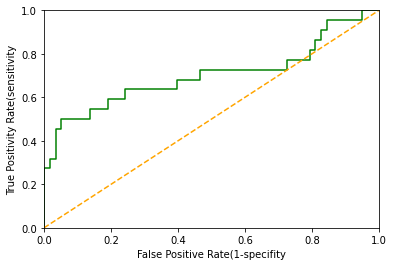

In [ ]:
plt.figure()
plt.plot(frp,trp,color='green',label='ROC'%roc_auc)
plt.plot([0,1],[0,1],color='orange',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-specifity')
plt.ylabel('True Positivity Rate(sensitivity')

In [ ]:
model2 = SVC(kernel = 'rbf',probability= True)

In [ ]:
model2.fit(x_train,y_train)

SVC(probability=True)

In [ ]:
pre = model.predict(x_test)
model.predict_proba(x_test)

array([[0.47433097, 0.52566903],
       [0.69416315, 0.30583685],
       [0.52696243, 0.47303757],
       [0.51571855, 0.48428145],
       [0.69776118, 0.30223882],
       [0.78694608, 0.21305392],
       [0.84026557, 0.15973443],
       [0.20792543, 0.79207457],
       [0.59737008, 0.40262992],
       [0.73363245, 0.26636755],
       [0.68965889, 0.31034111],
       [0.62859712, 0.37140288],
       [0.63559963, 0.36440037],
       [0.57331794, 0.42668206],
       [0.47393867, 0.52606133],
       [0.29831112, 0.70168888],
       [0.52048252, 0.47951748],
       [0.46141538, 0.53858462],
       [0.27093485, 0.72906515],
       [0.79999745, 0.20000255],
       [0.71867907, 0.28132093],
       [0.19544375, 0.80455625],
       [0.68279224, 0.31720776],
       [0.37192021, 0.62807979],
       [0.79600269, 0.20399731],
       [0.20485896, 0.79514104],
       [0.49155005, 0.50844995],
       [0.5220883 , 0.4779117 ],
       [0.63779984, 0.36220016],
       [0.52162398, 0.47837602],
       [0.

In [ ]:
x_test.shape

(80, 5)

In [ ]:
accuracy_score(y_test,pre)

0.725

In [ ]:
confusion_matrix(y_test,pre)

array([[58,  0],
       [22,  0]])

In [ ]:
z = classification(y_test,pre)
print(z)

NameError: ignored